## Javad Ranjbar Kermani
## 400209795
## Question 2 part a
## SVM (support vector method)#
## Imbalanced data

In [14]:
# import libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('factory products situation.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
values=df.values
feature_names=df.columns

In [17]:
target =np.where(feature_names =='Class')
tags=values[:,target].reshape((values.shape[0],)) # labels
features=values[:,0:-1]# features
print(features.shape)
print(tags.shape)

(284807, 30)
(284807,)


number of class 0 : 284315
number of class 1 : 492


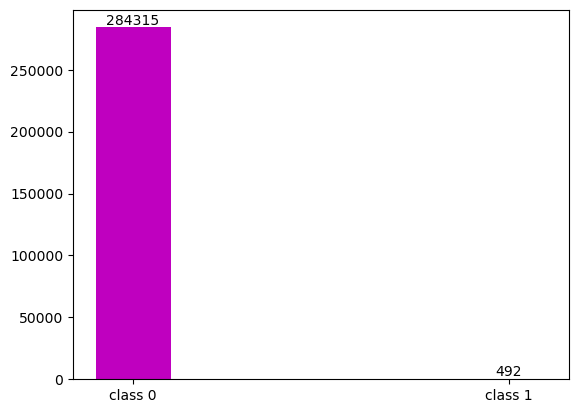

In [18]:
# plotting numer of class 0 and 1
class0_number=np.size(tags[tags==0])
class1_number=np.size(tags[tags==1])
print ('number of class 0 :', class0_number)
print ('number of class 1 :', class1_number)
# plotting number of data in two different label
a=['class 0','class 1']
plot = plt.bar(a,[class0_number,class1_number],width=0.2 , color='m')
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,height,str(height), ha='center', va='bottom')

In [19]:
# shuffling data
shuffled = df.sample(frac=1)
shuffled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105497,69553.0,0.727199,-0.889573,1.052514,0.977337,-1.484970,-0.523723,-0.316659,-0.042922,0.785632,...,0.254813,0.366848,-0.217182,0.785008,0.198980,0.528052,-0.038275,0.067300,240.00,0
8094,11018.0,-1.505727,0.939956,1.466964,2.916480,0.845103,0.825686,1.834700,-1.232261,1.371772,...,-0.678438,-0.022445,0.005623,-0.457479,0.018187,0.083781,-0.541792,-0.252865,121.42,0
19973,30691.0,-0.271129,0.726536,1.102154,1.223023,0.187399,0.290764,0.518745,0.174211,-0.168161,...,-0.142642,-0.250575,0.071820,-0.465895,-0.121334,-0.341850,0.325101,0.096659,55.19,0
268445,163214.0,-2.091522,2.035044,-0.141015,-0.885393,-1.300842,-0.539869,-1.074108,1.660188,0.004978,...,0.068553,-0.371810,0.276925,1.073274,-0.133032,-0.353837,-0.778793,-0.162042,0.77,0
208151,136995.0,-0.245984,0.963778,-0.723495,-0.951744,0.429541,-0.824693,0.807766,0.282250,0.047345,...,-0.111276,-0.360724,0.042098,0.551980,0.113310,-0.132510,0.056343,-0.037475,32.67,0


In [20]:
x_shuffled = shuffled.iloc[:,1:6] # 5 first features of shuffled data
y_shuffled = shuffled.iloc[:,-1] # labels of shuffled data
print(x_shuffled.shape)
print(y_shuffled.shape)

(284807, 5)
(284807,)


In [21]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, test_size = 0.2, random_state = 42)

## SVM Method

### Linear kernel

In [22]:
from sklearn.svm import SVC
svm_linear_model = SVC(kernel='linear')
svm_linear_model.fit(x_train,y_train)

SVC(kernel='linear')

In [63]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
y_pred_linear = svm_linear_model.predict(x_test)
print('precision score =', precision_score(y_test, y_pred_linear), '\n')
print('accuracy score =', accuracy_score(y_test, y_pred_linear), '\n')
print('f1 score =', f1_score(y_test, y_pred_linear), '\n')
print('recall score =', recall_score(y_test, y_pred_linear), '\n')

precision score = 0.88 

accuracy score = 0.9984726659878516 

f1 score = 0.3358778625954198 

recall score = 0.20754716981132076 



### Poly kernel

In [9]:
from sklearn.svm import SVC
svm_poly2_model = SVC(kernel='poly', degree = 2) #poly degree 2
svm_poly2_model.fit(x_train,y_train)

SVC(degree=2, kernel='poly')

In [10]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
y_pred_poly2 = svm_poly2_model.predict(x_test)
print('poly degree2 : \n')
print('precision score =', precision_score(y_test, y_pred_poly2))
print('accuracy score =', accuracy_score(y_test, y_pred_poly2))
print('f1 score =', f1_score(y_test, y_pred_poly2))
print('recall score =', recall_score(y_test, y_pred_poly2))

poly degree2 : 

precision score = 0.90625
accuracy score = 0.9987008883115059
f1 score = 0.4393939393939394
recall score = 0.29


In [12]:
from sklearn.svm import SVC
svm_poly3_model = SVC(kernel='poly', degree = 3) #poly degree 3
svm_poly3_model.fit(x_train,y_train)

SVC(kernel='poly')

In [13]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
y_pred_poly3 = svm_poly3_model.predict(x_test)
print('poly degree3 : \n')
print('precision score =', precision_score(y_test, y_pred_poly3))
print('accuracy score =', accuracy_score(y_test, y_pred_poly3))
print('f1 score =', f1_score(y_test, y_pred_poly3))
print('recall score =', recall_score(y_test, y_pred_poly3))

poly degree3 : 

precision score = 0.8125
accuracy score = 0.9988413328183702
f1 score = 0.5416666666666666
recall score = 0.40625


### rbf kernel

In [ ]:
from sklearn.svm import SVC
svm_rbf_model = SVC(kernel='rbf', gamma = 'scale')
svm_rbf_model.fit(x_train,y_train)

In [12]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
y_pred_rbf = svm_rbf_model.predict(x_test)
print('precision score =', precision_score(y_test, y_pred_rbf), '\n')
print('accuracy score =', accuracy_score(y_test, y_pred_rbf), '\n')
print('f1 score =', f1_score(y_test, y_pred_rbf), '\n')
print('recall score =', recall_score(y_test, y_pred_rbf), '\n')

precision score = 0.8909090909090909 

accuracy score = 0.9989993328885924 

f1 score = 0.632258064516129 

recall score = 0.49 



### Sigmoid kernel

In [10]:
from sklearn.svm import SVC
svm_sigmoid_model = SVC(kernel='sigmoid')
svm_sigmoid_model.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [11]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
y_pred_sigmoid = svm_sigmoid_model.predict(x_test)
print('precision score =', precision_score(y_test, y_pred_sigmoid), '\n')
print('accuracy score =', accuracy_score(y_test, y_pred_sigmoid), '\n')
print('f1 score =', f1_score(y_test, y_pred_sigmoid), '\n')
print('recall score =', recall_score(y_test, y_pred_sigmoid), '\n')

precision score = 0.011111111111111112 

accuracy score = 0.9967697763421228 

f1 score = 0.010752688172043012 

recall score = 0.010416666666666666 

